# Solving the Problem of Overfitting

## 1. The problem of overfitting

Throughout the past notebooks we have seen two different machine learning techniques:

1. Linear regression: For learning problems whose output is real valued.
2. Logistic regression: For learning problems whose output is discrete.

We've seen how to apply both of them having good results. However, more often than desired, these algorithms run into a problem called **overfitting**. Let's introduce the problem through an example.

**Example.** Let's consider a linear regression problem with the following data points:

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Data
x = np.array([1, 1.5, 2, 3, 5])
y = np.array([1, 2, 3, 3.5, 4])

[0, 6, 0, 5]

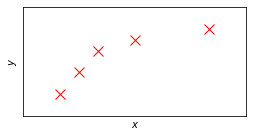

In [3]:
# Draw some data
plt.figure(figsize=(4, 2))
plt.plot(x, y, 'rx', ms=10)
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 6, 0, 5])

Now, let's fit the following hypotheses to these data:

$$
h^{1}_{\theta}(x) = \theta_0 + \theta_1 x,
$$

$$
h^{2}_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2,
$$

and

$$
h^{3}_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4.
$$

Let's find $\theta$ for each hypothesis using the normal equation:

In [4]:
X1 = np.concatenate([np.array([x**i]).T for i in range(2)], axis=1)
theta1 = np.linalg.solve(X1.T.dot(X1), X1.T.dot(y))
theta1

array([1.0125, 0.675 ])

In [5]:
X2 = np.concatenate([np.array([x**i]).T for i in range(3)], axis=1)
theta2 = np.linalg.solve(X2.T.dot(X2), X2.T.dot(y))
theta2

array([-1.07295285,  2.48362283, -0.29528536])

In [6]:
X4 = np.concatenate([np.array([x**i]).T for i in range(5)], axis=1)
theta4 = np.linalg.solve(X4.T.dot(X4), X4.T.dot(y))
theta4

array([ 2.21428572, -5.53571429,  6.05952381, -1.92857143,  0.19047619])

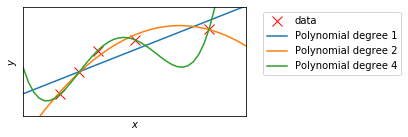

In [8]:
# Draw some data
plt.figure(figsize=(4, 2))
plt.plot(x, y, 'rx', ms=10, label='data')
x_fit = np.linspace(0, 7)
X1_fit = np.concatenate([np.array([x_fit**i]).T for i in range(2)], axis=1)
X2_fit = np.concatenate([np.array([x_fit**i]).T for i in range(3)], axis=1)
X4_fit = np.concatenate([np.array([x_fit**i]).T for i in range(5)], axis=1)
y1 = X1_fit.dot(theta1)
y2 = X2_fit.dot(theta2)
y4 = X4_fit.dot(theta4)
plt.plot(x_fit, y1, label='Polynomial degree 1')
plt.plot(x_fit, y2, label='Polynomial degree 2')
plt.plot(x_fit, y4, label='Polynomial degree 4')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 6, 0, 5])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

- We can see that the linear hypothesis "underfits" the data (high bias):
    $$
    h^{1}_{\theta}(x) = \theta_0 + \theta_1 x,
    $$

- The quadratic polynomial works pretty well:
    $$
    h^{2}_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2,
    $$

- The 4th degree polynomial exactly fits all the points. It does a very good job fitting the training set, but the curve does not follow the trend at all. It "overfits" the data (high variance):
    $$
    h^{3}_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4.
    $$

> **Overfitting**: If we have too many features, the learned hyplothesis may fit the training set very well, but will fail to generalize to new examples.

This phenomena also applies to the logistic regression algorithm.

### How can we address this problem?

1. Reduce the number of features.
   - Manually select which features to keep.
   - Model selection algorithm.
   
2. Regularization.
   - Keep all the features but reduce the magnitude of the parameters $\theta_j$.
   - Works well when we have a lot of features, each of which contributes a bit to predict $y$.

## 2. Cost Function

Let's see the figures of the example above:

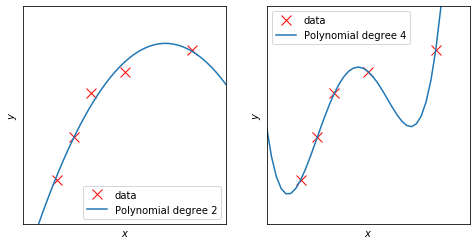

In [9]:
# Draw some data
x_fit = np.linspace(0, 7)
X2_fit = np.concatenate([np.array([x_fit**i]).T for i in range(3)], axis=1)
X4_fit = np.concatenate([np.array([x_fit**i]).T for i in range(5)], axis=1)
y2 = X2_fit.dot(theta2)
y4 = X4_fit.dot(theta4)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y, 'rx', ms=10, label='data')
plt.plot(x_fit, y2, label='Polynomial degree 2')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 6, 0, 5])
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(x, y, 'rx', ms=10, label='data')
plt.plot(x_fit, y4, label='Polynomial degree 4')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 6, 0, 5])
plt.legend(loc='best')

Consider the following optimization problem:

$$
\min_{\boldsymbol{\theta}} \frac{1}{2m}\left[\sum_{i=1}^{m}(h_{\theta}(\boldsymbol{x}^{(i)}) - y^{i})^2 + \lambda(\theta_3^2 + \theta_4^2)\right]
$$

which intuitively attempts to solve for $\boldsymbol{\theta}$ such that:

1. The hypothesis fits the data.
2. The parameters $\theta_3$ and $\theta_4$ are small.

In fact, if $\lambda$ is big, $\theta_3 \approx \theta_4 \approx 0$, which approximately yields a quadratic function (which we know that correctly fits the data).

Here, we penalized two of the parameters. 

In general, the idea of **regularization** is to have not too large values for the parameters $\theta_i$, for $i\in\{1, 2, \dots, n\}$.

This idea is carried out to:
- Obtain simpler hypothesis.
- Make the model less prone to overfitting.

## 3. Regularized Linear Regression

In this sense, we can add an $L^2$ regularization term to the cost function for linear regression as follows:

$$
\min_{\boldsymbol{\theta}} \frac{1}{2m}\left[\sum_{i=1}^{m}(h_{\theta}(\boldsymbol{x}^{(i)}) - y^{i})^2 + \lambda \sum_{j=1}^{n}\theta_j^2\right].
$$

Or, equivalently 

$$
\min_{\boldsymbol{\theta}} \frac{1}{2m}\left[\left\lvert\left\lvert\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y}\right\rvert\right\rvert^2 + \lambda \left\lvert\left\lvert\bar{\boldsymbol{\theta}}_{1}\right\rvert\right\rvert^2\right],
$$

where

$$\bar{\boldsymbol{\theta}}_{1} = \left[\begin{array}{c}
\theta_1 \\
\vdots \\
\theta_n
\end{array}\right] = \left[\begin{array}{cc}
0 & \boldsymbol{0}_{1\times n} \\
\boldsymbol{0}_{n\times 1} & \boldsymbol{I}_{n \times n}\\
\end{array}\right] \boldsymbol{\theta} = \boldsymbol{A} \boldsymbol{\theta}.$$

In this sense, the above objective function could be rewritten as:

$$
\min_{\boldsymbol{\theta}} \frac{1}{2m}\left\lvert\left\lvert\tilde{\boldsymbol{X}}\boldsymbol{\theta} - \tilde{\boldsymbol{y}}\right\rvert\right\rvert^2,
$$

where 

$$
\tilde{\boldsymbol{X}} = \left[\begin{array}{c}
\boldsymbol{X} \\
\sqrt{\lambda}\boldsymbol{A}
\end{array}\right],
$$

and

$$
\tilde{\boldsymbol{y}} = \left[\begin{array}{c}
\boldsymbol{y} \\
\boldsymbol{0}_{(n+1) \times 1}
\end{array}\right].
$$

Thus, the global minimizer for the regularized objective in linear regression yields:

$$
\boldsymbol{\theta} = (\tilde{\boldsymbol{X}}^T\tilde{\boldsymbol{X}})^{-1}\tilde{\boldsymbol{X}}^T \tilde{\boldsymbol{y}}= (\boldsymbol{X}^T\boldsymbol{X} + \lambda A)^{-1}\boldsymbol{X}^T \boldsymbol{y}
$$ 

In [29]:
l = 0.3
A = np.block([[np.zeros((1, 1)), np.zeros((1, 4))],
              [np.zeros((4, 1)), np.eye(4)]])
theta4_reg = np.linalg.solve(X4.T.dot(X4) + l * A, X4.T.dot(y))
theta4_reg

array([ 0.39693095,  0.44421803,  0.61098893, -0.16216692,  0.01018527])

In [30]:
theta4

array([ 2.21428572, -5.53571429,  6.05952381, -1.92857143,  0.19047619])

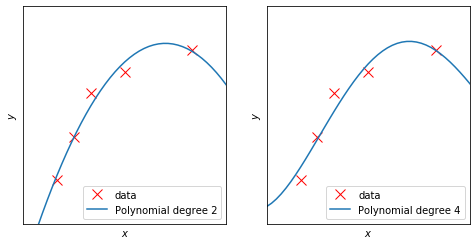

In [31]:
# Draw some data
x_fit = np.linspace(0, 7)
X2_fit = np.concatenate([np.array([x_fit**i]).T for i in range(3)], axis=1)
X4_fit = np.concatenate([np.array([x_fit**i]).T for i in range(5)], axis=1)
y2 = X2_fit.dot(theta2)
y4 = X4_fit.dot(theta4_reg)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(x, y, 'rx', ms=10, label='data')
plt.plot(x_fit, y2, label='Polynomial degree 2')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 6, 0, 5])
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(x, y, 'rx', ms=10, label='data')
plt.plot(x_fit, y4, label='Polynomial degree 4')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 6, 0, 5])
plt.legend(loc='best')

As we can see, the overfitting phenomena is attenuated.

### How does the regularization looks like in the gradient descent algorithm?

We have that the regularized cost for linear regression is:

$$
J(\boldsymbol{\theta}) = \frac{1}{2m}\left[\left\lvert\left\lvert\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y}\right\rvert\right\rvert^2 + \lambda \left\lvert\left\lvert \boldsymbol{A}\boldsymbol{\theta}\right\rvert\right\rvert^2\right],
$$

This implies that:

$$
\frac{\partial}{\partial \boldsymbol{\theta}} J(\boldsymbol{\theta}) = \frac{1}{m} \boldsymbol{X}^T (\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y}) + \frac{\lambda}{m}A^T A\boldsymbol{\theta} = \frac{1}{m} \boldsymbol{X}^T (\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y}) + \frac{\lambda}{m}A\boldsymbol{\theta}.
$$

Thus, the gradient descent algorithm would take the form:

- Initialize $\boldsymbol{\theta}$.

- repeat until convergence {
  $$\boldsymbol{\theta} := \boldsymbol{\theta} - \alpha\left[ \frac{1}{m} \boldsymbol{X}^T (\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y}) + \frac{\lambda}{m}A\boldsymbol{\theta}\right] = \left(\boldsymbol{I}_{(n+1) \times (n+1)} - \alpha\frac{\lambda}{m}A\right) \boldsymbol{\theta} - \alpha\frac{1}{m} \boldsymbol{X}^T (\boldsymbol{X}\boldsymbol{\theta} - \boldsymbol{y})$$
  }

Note that the terms $1 - \alpha\frac{\lambda}{m} < 1$.

The same ideas apply for logistic regression. Please see the next notebook for concrete visualizations on this.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>